In [1]:
!pip install pennylane-sf --upgrade
!pip install tensornetwork
!pip install qutip

Requirement already up-to-date: pennylane-sf in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
from google.colab import files
files.upload()

Saving vqe_function_states.py to vqe_function_states (1).py


{'vqe_function_states.py': b'import pennylane as qml\r\nimport tensorflow as tf \r\nimport numpy as np\r\n\r\ndef run_vqe(cost_fn, max_iter, initial_params, opt, opt_step, dev, diag_approx=False):\r\n    """\r\n    run a VQE trial.\r\n    \r\n    args:\r\n    \r\n        cost_fn (VQECost): the cost function we are trying to optimize\r\n    \r\n        max_iter (int): number iterations of energy improvement for the VQE run.\r\n        \r\n        initial_params (nump.ndarray): the initial params we\'re starting with \r\n    \r\n        opt (string): type of optimizer we\'re using for the VQE run \r\n            (can be qml.QNGOptimizer, qml.GradientDescentOptimizer)\r\n\r\n        dev: configure the device using qml.device(\'device name\', wires=\'# of wires\')\r\n        \r\n        opt_step (float): the optimization step you\'re using for the optimizer.\r\n        \r\n        if opt=QNGOptimizer,\r\n            diag_approx (boolean): if using the quantum natural gradient descent optim

### Import all packages

In [0]:
import tensorflow as tf
import pennylane as qml
from pennylane.qnodes import PassthruQNode
from vqe_function_states import run_vqe

import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import qutip as qt
from qutip import Bloch, basis

### Define circuit and hamiltonian

In [0]:
dev = qml.device('default.qubit', wires=1)

def circuit(params, wires=0):
  qml.RX(params[0], wires=wires)
  qml.RY(params[1], wires=wires)

qnode = PassthruQNode(circuit, dev)

In [0]:
coeffs = [1, 1]
obs = [qml.PauliX(0), qml.PauliZ(0)]

H = qml.Hamiltonian(coeffs, obs)
cost_fn = qml.VQECost(circuit, H, dev)

init_params = np.random.uniform(low=0, high=2*np.pi, size=2)

In [0]:
step_size = 0.01
max_iterations = 500

### Run iterations using function

In [49]:
qng_energy, qng_params, qng_states, qng_steps = run_vqe(cost_fn=cost_fn, max_iter=max_iterations, initial_params=init_params, opt='QNGOptimizer', opt_step=step_size, dev = qml.device('default.qubit', wires=1), diag_approx=True)

Iteration = 0 Energy = 0.07326718 Ha, Convergence parameter = 0.07208361 Ha State [1.+0.j 0.+0.j]
Iteration = 20 Energy = -1.11839227 Ha, Convergence parameter = 0.03207714 Ha State [1.+0.j 0.+0.j]
Iteration = 40 Energy = -1.38221876 Ha, Convergence parameter = 0.00389873 Ha State [1.+0.j 0.+0.j]
Iteration = 60 Energy = -1.41106422 Ha, Convergence parameter = 0.00038848 Ha State [1.+0.j 0.+0.j]
Iteration = 80 Energy = -1.41390659 Ha, Convergence parameter = 0.00003791 Ha State [1.+0.j 0.+0.j]
Iteration = 100 Energy = -1.41418367 Ha, Convergence parameter = 0.00000369 Ha State [1.+0.j 0.+0.j]

Final value of the ground-state energy = -1.41420617 Ha

Final state [1.+0.j 0.+0.j]

Number of iterations =  111


In [50]:
vanilla_energy, vanilla_params, vanilla_states, vanilla_steps = run_vqe(cost_fn=cost_fn, max_iter=max_iterations, initial_params=init_params, opt='GradientDescentOptimizer', opt_step=step_size, dev = qml.device('default.qubit', wires=1), diag_approx=True)

Iteration = 0 Energy = 0.13384942 Ha, Convergence parameter = 0.01150137 Ha State [1.+0.j 0.+0.j]
Iteration = 20 Energy = -0.09452460 Ha, Convergence parameter = 0.01142258 Ha State [1.+0.j 0.+0.j]
Iteration = 40 Energy = -0.32599700 Ha, Convergence parameter = 0.01173807 Ha State [1.+0.j 0.+0.j]
Iteration = 60 Energy = -0.56259686 Ha, Convergence parameter = 0.01180334 Ha State [1.+0.j 0.+0.j]
Iteration = 80 Energy = -0.79085048 Ha, Convergence parameter = 0.01086993 Ha State [1.+0.j 0.+0.j]
Iteration = 100 Energy = -0.98869473 Ha, Convergence parameter = 0.00887861 Ha State [1.+0.j 0.+0.j]
Iteration = 120 Energy = -1.14096183 Ha, Convergence parameter = 0.00646303 Ha State [1.+0.j 0.+0.j]
Iteration = 140 Energy = -1.24668595 Ha, Convergence parameter = 0.00429676 Ha State [1.+0.j 0.+0.j]
Iteration = 160 Energy = -1.31469785 Ha, Convergence parameter = 0.00268242 Ha State [1.+0.j 0.+0.j]
Iteration = 180 Energy = -1.35627083 Ha, Convergence parameter = 0.00160858 Ha State [1.+0.j 0.+0.

### Compare with basic plot



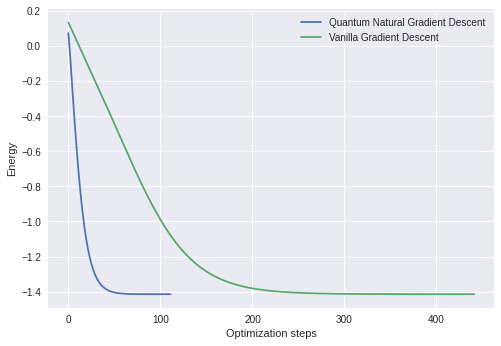

In [51]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
plt.plot(qng_energy, label="Quantum Natural Gradient Descent")
plt.plot(vanilla_energy, label="Vanilla Gradient Descent")

plt.ylabel("Energy")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

### Param space visualization

In [0]:
qng_lst = np.array(qng_params)
qng_param_1_list = qng_lst[:,0].tolist()
qng_param_2_list = qng_lst[:,1].tolist()

plot_qng_param_1_list = qng_param_1_list[::10]
plot_qng_param_2_list = qng_param_2_list[::10]

In [0]:
vanilla_lst = np.array(vanilla_params)
vanilla_param_1_list = vanilla_lst[:,0].tolist()
vanilla_param_2_list = vanilla_lst[:,1].tolist()

plot_vanilla_param_1_list = vanilla_param_1_list[::10]
plot_vanilla_param_2_list = vanilla_param_2_list[::10]

In [0]:
param_1_points, param_2_points = (100, 100)
theta_first = np.linspace(0., 2.*np.pi, param_1_points)
theta_second = np.linspace(0., 2.*np.pi, param_2_points)
theta_firstv, theta_secondv = np.meshgrid(theta_first, theta_second, indexing='ij')

fn_values = np.zeros((param_1_points, param_2_points))

for i in range(param_1_points):
    for j in range(param_2_points):
        fn_values[i, j] = cost_fn([theta_firstv[i,j], theta_secondv[i,j]])

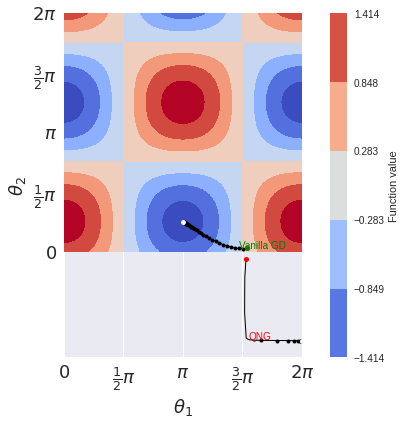

In [55]:
plt.style.use("seaborn")
fontsize = 18

fig, axes = plt.subplots(figsize=(8, 6))
cmap = plt.cm.get_cmap("coolwarm")
contour_plot = plt.contourf(theta_firstv, theta_secondv, fn_values, extend='both',
                            cmap=cmap)

m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_array(fn_values)
m.set_clim(np.min(fn_values), np.max(fn_values))
cbar = plt.colorbar(m, boundaries=np.linspace(np.min(fn_values), np.max(fn_values), 6))

cbar.ax.set_ylabel("Function value")

## Optimization path for QNG ##
 
# plot optimization path and every 10th point
plt.plot(qng_param_1_list, qng_param_2_list, 'k-', linewidth = 1)
plt.plot(plot_qng_param_1_list, plot_qng_param_2_list, 'ko', markersize = 4)

# plot and annotate start and end points
plt.plot(qng_param_1_list[0], qng_param_2_list[0], 'ro', markersize = 5)
plt.plot(qng_param_1_list[qng_steps], qng_param_2_list[qng_steps], 'wo', markersize = 5)

plt.annotate("QNG", (qng_param_1_list[4], qng_param_2_list[4]), color = 'r')

#plt.annotate("Start point", (qng_param_1_list[0], qng_param_2_list[0]), color = 'r')
#plt.annotate("End point", (qng_param_1_list[qng_steps], qng_param_2_list[qng_steps]), color = 'w')

## Optimization path for QNG ##
 
# plot optimization path and every 10th point
plt.plot(vanilla_param_1_list, vanilla_param_2_list, 'k-', linewidth = 1)
plt.plot(plot_vanilla_param_1_list, plot_vanilla_param_2_list, 'ko', markersize = 4)

# plot and annotate start and end points
plt.plot(vanilla_param_1_list[0], vanilla_param_2_list[0], 'go', markersize = 5)
plt.plot(vanilla_param_1_list[vanilla_steps], vanilla_param_2_list[vanilla_steps], 'wo', markersize = 5)

plt.annotate("Vanilla GD", (vanilla_param_1_list[20], vanilla_param_2_list[20]), color = 'g')

#plt.annotate("Start point", (vanilla_param_1_list[0], vanilla_param_2_list[0]), color = 'r')
#plt.annotate("End point", (vanilla_param_1_list[vanilla_steps], vanilla_param_2_list[vanilla_steps]), color = 'w')

## Set axis labels ##
axes.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
axes.set_yticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])

axes.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"], fontsize=fontsize)
axes.set_yticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"], fontsize=fontsize)
plt.xlabel(r'$\theta_1$', fontsize=fontsize)        
plt.ylabel(r'$\theta_2$', fontsize=fontsize)        

axes.set_aspect('equal')

plt.tight_layout()

### Bloch sphere visualization

1. Bloch sphere 1 is for QNG path
2. Bloch sphere 2 is for comparing QNG and Vanilla GD path

In [0]:
# quantum natural gradient statevectors for plotting
qng_plot_states = []
lst = qng_states

for i in range(len(lst)):
  psi = lst[i]
  psi = psi/np.linalg.norm(psi)

  # Convert to QObject in QuTiP
  coords = [qt.Qobj(psi)]

  qng_plot_states.append(coords)

# vanilla gradient descent statevectors for plotting
vanilla_plot_states = []
lst = vanilla_states

for i in range(len(lst)):
  vanilla_psi = lst[i]
  vanilla_psi = vanilla_psi/np.linalg.norm(vanilla_psi)

  # Convert to QObject in QuTiP
  coords = [qt.Qobj(vanilla_psi)]

  vanilla_plot_states.append(coords)

In [0]:
from qutip.expect import expect
from qutip.operators import sigmax, sigmay, sigmaz

qng_coords_x = []
qng_coords_y = []
qng_coords_z = []

for qobj in qng_plot_states:
    st = qobj
    x = expect(sigmax(), st)
    y = expect(sigmay(), st)
    z = expect(sigmaz(), st)

    for i in range(len(x)):
      x_list = x[i]
      qng_coords_x.append(x_list)

      y_list = y[i]
      qng_coords_y.append(y_list)

      z_list = z[i]
      qng_coords_z.append(z_list)

vanilla_coords_x = []
vanilla_coords_y = []
vanilla_coords_z = []

for qobj in vanilla_plot_states:
    st = qobj
    x = expect(sigmax(), st)
    y = expect(sigmay(), st)
    z = expect(sigmaz(), st)

    for i in range(len(x)):
      x_list = x[i]
      vanilla_coords_x.append(x_list)

      y_list = y[i]
      vanilla_coords_y.append(y_list)

      z_list = z[i]
      vanilla_coords_z.append(z_list)

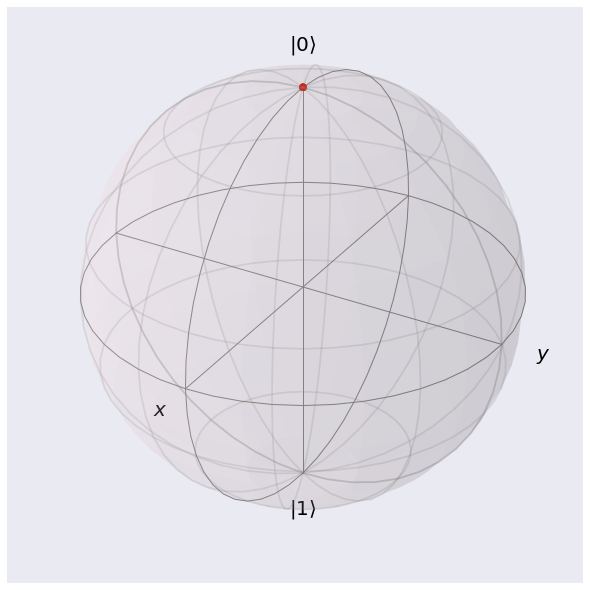

In [62]:
### Settings for Bloch sphere visualization  for QNG ###

b = Bloch()
b.sphere_alpha = 0.1
b.figsize = [8,8]

# normalize colors #
nrm = mpl.colors.Normalize(0, len(qng_coords_x[::10]))
colors = cm.jet(nrm(range(len(qng_coords_x[::10]))))
b.point_color = list(colors)
b.point_marker = 'o'
b.point_size = [50]

# Add points
b.add_states(qng_plot_states[::10], 'point')

# Add line
b.add_points([qng_coords_x, qng_coords_y, qng_coords_z], 'l')

b.show()

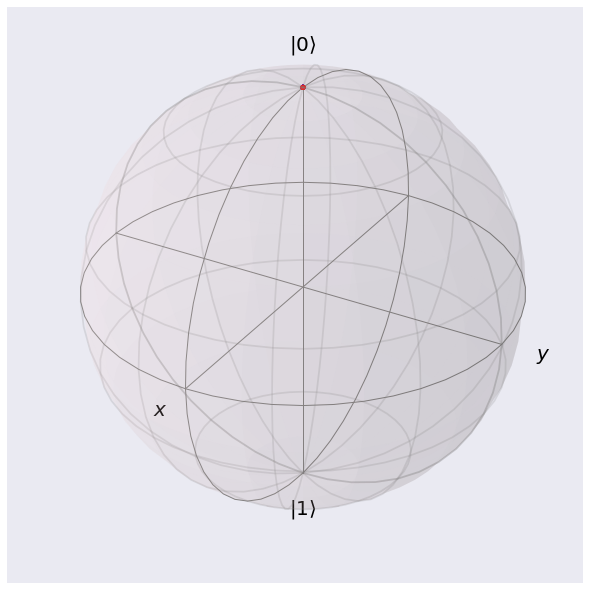

In [63]:
### Settings for Bloch sphere visualization  for QNG vs Vanilla GD ###

b = Bloch()
b.sphere_alpha = 0.1
b.figsize = [8,8]

# colors #
colors = ['b', 'b', 'r', 'r']
b.point_color = list(colors)

b.point_marker = 'o'
b.point_size = [20]

# Add points
b.add_points([vanilla_coords_x[::10], vanilla_coords_y[::10], vanilla_coords_z[::10]])
# Add line
b.add_points([vanilla_coords_x, vanilla_coords_y, vanilla_coords_z], 'l')

# Add points
b.add_points([qng_coords_x[::10], qng_coords_y[::10], qng_coords_z[::10]])
# Add line
b.add_points([qng_coords_x, qng_coords_y, qng_coords_z], 'l')


b.show()